# MSDS 453 Natural Language Processing Final

In [1]:
# If you never installed TextBlob before you need to run this cell
!pip install TextBlob
!pip install docx2txt
!pip install python-docx


# 1. Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import torch 
import docx2txt
import docx
from numpy import mean   

import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from textblob import TextBlob
from torch import nn
from torch import optim

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import DataLoader, Dataset

from docx import Document

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\PAIN IN MY
[nltk_data]     ASS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 2. Loading Documents

In [4]:
febText = docx2txt.process("February_Doc.docx")
marText = docx2txt.process("March_Doc.docx")
aprText = docx2txt.process("April_Doc.docx")
mayText = docx2txt.process("May_Doc.docx")
juneText = docx2txt.process("June_Doc.docx")
julyText = docx2txt.process("July_Doc.docx")
augText = docx2txt.process("August_Doc.docx")
septText = docx2txt.process("September_Doc.docx")
octText = docx2txt.process("October_Doc.docx")


# 3. Splitting Documents into Bag of Words

In [5]:
stop_words = set(stopwords.words('english'))
punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

def remove_punctuation(text):
    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")
    return text

In [7]:
#Removing stop words from text
bagFeb = remove_stopwords(febText)
bagMar = remove_stopwords(marText)
bagApr = remove_stopwords(aprText)
bagMay = remove_stopwords(mayText)
bagJune = remove_stopwords(juneText)
bagJuly = remove_stopwords(julyText)
bagAug = remove_stopwords(augText)
bagSept = remove_stopwords(septText)
bagOct = remove_stopwords(octText)


In [8]:
#Removing puncuation from text
bagFeb = remove_punctuation(bagFeb)
bagMar = remove_punctuation(bagMar)
bagApr = remove_punctuation(bagApr)
bagMay = remove_punctuation(bagMay)
bagJune = remove_punctuation(bagJune)
bagJuly = remove_punctuation(bagJuly)
bagAug = remove_punctuation(bagAug)
bagSept = remove_punctuation(bagSept)
bagOct = remove_punctuation(bagOct)

In [9]:
#Splitting text into words
bagFeb = bagFeb.split(' ')
bagMar = bagMar.split(' ')
bagApr = bagApr.split(' ')
bagMay = bagMay.split(' ')
bagJune = bagJune.split(' ')
bagJuly = bagJuly.split(' ')
bagAug = bagAug.split(' ')
bagSept = bagSept.split(' ')
bagOct = bagOct.split(' ')

In [10]:
#Finding each months set of unique words and the total corpus of unique words
uniqueFeb = set(bagFeb)
uniqueMar = set(bagMar)
uniqueApr = set(bagApr)
uniqueMay = set(bagMay)
uniqueJune = set(bagJune)
uniqueJuly = set(bagJuly)
uniqueAug = set(bagAug)
uniqueSept = set(bagSept)
uniqueOct = set(bagOct)
uniqueWords = set(bagFeb).union(set(bagMar),set(bagApr),set(bagMay),set(bagJune),set(bagJuly),set(bagAug),set(bagSept),set(bagOct))

In [11]:
numFeb = dict.fromkeys(uniqueWords, 0)
numMar = dict.fromkeys(uniqueWords, 0)
numApr = dict.fromkeys(uniqueWords, 0)
numMay = dict.fromkeys(uniqueWords, 0)
numJune = dict.fromkeys(uniqueWords, 0)
numJuly = dict.fromkeys(uniqueWords, 0)
numAug = dict.fromkeys(uniqueWords, 0)
numSept = dict.fromkeys(uniqueWords, 0)
numOct = dict.fromkeys(uniqueWords, 0)

for word in bagFeb:
    numFeb[word] +=1

for word in bagMar:
    numMar[word]+=1

for word in bagApr:
    numApr[word]+=1
    
for word in bagMay:
    numMay[word]+=1

for word in bagJune:
    numJune[word]+=1
    
for word in bagJuly:
    numJuly[word]+=1
    
for word in bagAug:
    numAug[word]+=1
    
for word in bagSept:
    numSept[word]+=1
    
for word in bagOct:
    numOct[word]+=1

# 4. Term Frequency TF-IDF

In [12]:
def computeTf (wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bagOfWordsCount)
    return tfDict

In [13]:
tfFeb = computeTf(numFeb, bagFeb)
tfMar = computeTf(numMar, bagMar)
tfApr = computeTf(numApr, bagApr)
tfMay = computeTf(numMay, bagMay)
tfJune = computeTf(numJune, bagJune)
tfJuly = computeTf(numJuly, bagJuly)
tfAug = computeTf(numAug, bagAug)
tfSept = computeTf(numSept, bagSept)
tfOct = computeTf(numOct, bagOct)

In [14]:
def computeIDF (documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(),0)
    for document in documents:
        for word, val in document.items():
            idfDict[word]+=1
            
        for word, val in idfDict.items():
            idfDict[word]= math.log(N/float(val))
            
        return idfDict

In [15]:
idfs = computeIDF([numFeb,numMar,numApr,numMay,numJune,numJuly,numAug,numSept,numOct])

In [16]:
def computeTFIDF(tfbag, idfs):
    tfidf = {}
    for word, val in tfbag.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [17]:
tfidfFeb = computeTFIDF(tfFeb, idfs)
tfidfMar = computeTFIDF(tfMar, idfs)
tfidfApr = computeTFIDF(tfApr, idfs)
tfidfMay = computeTFIDF(tfMay, idfs)
tfidfJune = computeTFIDF(tfJune, idfs)
tfidfJuly = computeTFIDF(tfJuly, idfs)
tfidfAug = computeTFIDF(tfAug, idfs)
tfidfSept = computeTFIDF(tfSept, idfs)
tfidfOct = computeTFIDF(tfOct, idfs)

df = pd.DataFrame([tfidfFeb,tfidfMar,tfidfApr,tfidfMay,tfidfJune,tfidfJuly,tfidfAug,tfidfSept,tfidfOct])

In [18]:
df

,vladimir,,tabs,important,igor,highlights,territory,humanitarian,lockheed,found,...,performance,relations,dollars,president’s,4751,large,enterprise,valdai,automatic,interim
0,0.010877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.009942,0.000000,0.000000,0.000000,0.009942,0.000000,0.000000,0.034798,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.009942,0.000000,0.00000,0.000000,0.000000
2,0.002810,0.047766,0.000000,0.000000,0.000000,0.000000,0.002810,0.025288,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00281,0.000000,0.000000
3,0.000000,0.032110,0.004587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.004587,0.000000
4,0.000000,0.011771,0.000000,0.003924,0.007847,0.000000,0.015694,0.003924,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003924,0.000000,0.011771,0.00000,0.000000,0.007847
5,0.008650,0.000000,0.000000,0.000000,0.000000,0.000000,0.017301,0.008650,0.000000,0.000000,...,0.000000,0.000000,0.008650,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.034118,0.000000,0.004549,0.009098,0.000000,0.000000,0.018196,0.004549,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.007336,0.051354,0.000000,0.000000,0.007336,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.008243,0.034148,0.000000,0.001178,0.000000,0.007065,0.001178,0.000000,0.000000,0.001178,...,0.000000,0.001178,0.001178,0.001178,0.000000,0.001178,0.000000,0.00000,0.000000,0.000000


In [19]:
dfTest = df.transpose()
dfTest = dfTest.rename(columns ={0:'Feb',1:'Mar',2:'Apr',3:'May',4:'June',5:'July',6:'Aug',7:'Sept',8:'Oct'}, errors='raise')


In [20]:
dfTest.sort_values(by='Oct',ascending = False)

,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct
russia,0.010877,0.000000,0.033717,0.004587,0.027465,0.043252,0.002275,0.003668,0.038858
,0.000000,0.000000,0.047766,0.032110,0.011771,0.000000,0.034118,0.051354,0.034148
russian,0.065264,0.054682,0.047766,0.041284,0.062778,0.034602,0.047766,0.091704,0.032970
ukrainian,0.097896,0.049711,0.019668,0.009174,0.007847,0.017301,0.031844,0.022009,0.030615
rt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028260
...,...,...,...,...,...,...,...,...,...
enemy,0.000000,0.000000,0.000000,0.004587,0.003924,0.000000,0.000000,0.000000,0.000000
remark,0.000000,0.000000,0.000000,0.004587,0.000000,0.000000,0.000000,0.000000,0.000000
v,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003668,0.000000
him,0.000000,0.000000,0.002810,0.000000,0.000000,0.000000,0.000000,0.003668,0.000000


# 5. Sentiment Analysis

In [21]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to C:\Users\PAIN IN MY
[nltk_data]     ASS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PAIN IN MY ASS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
!pip install transformers
!pip install vaderSentiment

In [23]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
from nltk import classify
from nltk import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as si
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re, string

In [24]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

In [25]:
totalData = febText+marText+aprText+mayText+juneText+julyText+augText+septText+octText

In [190]:
data = totalData
sentData = {}
i = 0
type(data)


str

In [191]:
def sentiment_scores(text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(text)
    
    print("Overall sentiment dictionary is: ", sentiment_dict)
    print("Text was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("Text was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("Text was rated as ", sentiment_dict['pos']*100, "% Positive")
    print ("Sentence Overall Rated As", end = " ")
    
    if sentiment_dict['compound'] >= 0.05:
        print("Positive")
        #sentData['Overall']='Positive'
    elif sentiment_dict['compound'] <= -0.05:
        print("Negative")
        #sentData['Overall'] = 'Negative'
    else:
        print('Neutral')
    sentData['Neg'.format(text)] = sentiment_dict['neg']*100
    sentData['Neu'.format(text)] = sentiment_dict['neu']*100
    sentData['Pos'.format(text)] = sentiment_dict['pos']*100

In [192]:
sentiment_scores(febText)
febSent = pd.DataFrame.from_dict(sentData, orient='index')

Overall sentiment dictionary is:  {'neg': 0.077, 'neu': 0.838, 'pos': 0.085, 'compound': -0.0777}
Text was rated as  7.7 % Negative
Text was rated as  83.8 % Neutral
Text was rated as  8.5 % Positive
Sentence Overall Rated As Negative


In [193]:
sentiment_scores(marText)
marSent = pd.DataFrame.from_dict(sentData, orient='index')

Overall sentiment dictionary is:  {'neg': 0.108, 'neu': 0.844, 'pos': 0.049, 'compound': -0.9945}
Text was rated as  10.8 % Negative
Text was rated as  84.39999999999999 % Neutral
Text was rated as  4.9 % Positive
Sentence Overall Rated As Negative


In [194]:
sentiment_scores(aprText)
aprSent = pd.DataFrame.from_dict(sentData, orient='index')

Overall sentiment dictionary is:  {'neg': 0.075, 'neu': 0.851, 'pos': 0.073, 'compound': -0.6683}
Text was rated as  7.5 % Negative
Text was rated as  85.1 % Neutral
Text was rated as  7.3 % Positive
Sentence Overall Rated As Negative


In [195]:
sentiment_scores(mayText)
maySent = pd.DataFrame.from_dict(sentData, orient='index')

Overall sentiment dictionary is:  {'neg': 0.075, 'neu': 0.804, 'pos': 0.121, 'compound': 0.9805}
Text was rated as  7.5 % Negative
Text was rated as  80.4 % Neutral
Text was rated as  12.1 % Positive
Sentence Overall Rated As Positive


In [196]:
sentiment_scores(juneText)
juneSent = pd.DataFrame.from_dict(sentData, orient='index')

Overall sentiment dictionary is:  {'neg': 0.057, 'neu': 0.878, 'pos': 0.066, 'compound': -0.7414}
Text was rated as  5.7 % Negative
Text was rated as  87.8 % Neutral
Text was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Negative


In [197]:
sentiment_scores(julyText)
julySent = pd.DataFrame.from_dict(sentData, orient='index')

Overall sentiment dictionary is:  {'neg': 0.055, 'neu': 0.881, 'pos': 0.064, 'compound': -0.276}
Text was rated as  5.5 % Negative
Text was rated as  88.1 % Neutral
Text was rated as  6.4 % Positive
Sentence Overall Rated As Negative


In [198]:
sentiment_scores(augText)
augSent = pd.DataFrame.from_dict(sentData, orient='index')

Overall sentiment dictionary is:  {'neg': 0.075, 'neu': 0.864, 'pos': 0.06, 'compound': -0.9905}
Text was rated as  7.5 % Negative
Text was rated as  86.4 % Neutral
Text was rated as  6.0 % Positive
Sentence Overall Rated As Negative


In [199]:
sentiment_scores(septText)
septSent = pd.DataFrame.from_dict(sentData, orient='index')

Overall sentiment dictionary is:  {'neg': 0.035, 'neu': 0.892, 'pos': 0.072, 'compound': 0.9567}
Text was rated as  3.5000000000000004 % Negative
Text was rated as  89.2 % Neutral
Text was rated as  7.199999999999999 % Positive
Sentence Overall Rated As Positive


In [200]:
sentiment_scores(octText)
octSent = pd.DataFrame.from_dict(sentData, orient='index')

Overall sentiment dictionary is:  {'neg': 0.094, 'neu': 0.846, 'pos': 0.061, 'compound': -0.9987}
Text was rated as  9.4 % Negative
Text was rated as  84.6 % Neutral
Text was rated as  6.1 % Positive
Sentence Overall Rated As Negative


In [229]:
Total = febText+marText+aprText+mayText+juneText+julyText+augText+septText+octText
sentiment_scores(Total)

Overall sentiment dictionary is:  {'neg': 0.094, 'neu': 0.825, 'pos': 0.08, 'compound': -0.9998}
Text was rated as  9.4 % Negative
Text was rated as  82.5 % Neutral
Text was rated as  8.0 % Positive
Sentence Overall Rated As Negative


In [201]:
frames = [febSent,marSent,aprSent,maySent,juneSent,julySent,augSent,septSent,octSent]
marSent

totalSent = pd.DataFrame()
totalSent['Feb'] = febSent
totalSent['Mar'] = marSent
totalSent['Apr'] = aprSent
totalSent['May'] = maySent
totalSent['June'] = juneSent
totalSent['July'] = julySent
totalSent['Aug'] = augSent
totalSent['Sept'] = septSent
totalSent['Oct'] = octSent
totalSent

,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct
Neg,7.7,10.8,7.5,7.5,5.7,5.5,7.5,3.5,9.4
Neu,83.8,84.4,85.1,80.4,87.8,88.1,86.4,89.2,84.6
Pos,8.5,4.9,7.3,12.1,6.6,6.4,6.0,7.2,6.1


In [211]:
totalSent2 = totalSent.transpose()
totalSent2.rename(columns={'Neg':'Neg','Neu':'Neu','Pos':'Pos'})

,Neg,Neu,Pos
Feb,7.7,83.8,8.5
Mar,10.8,84.4,4.9
Apr,7.5,85.1,7.3
May,7.5,80.4,12.1
June,5.7,87.8,6.6
July,5.5,88.1,6.4
Aug,7.5,86.4,6.0
Sept,3.5,89.2,7.2
Oct,9.4,84.6,6.1


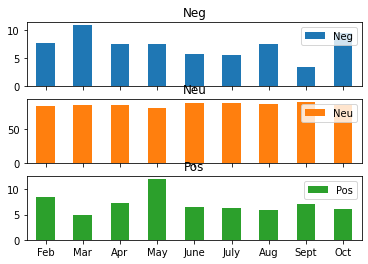

In [203]:
ax = totalSent2.plot.bar(rot=0, subplots=True)

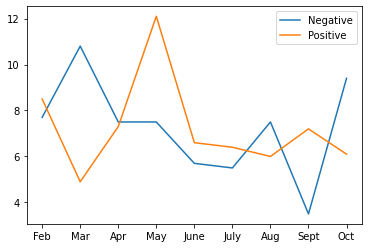

In [216]:
plt.plot(totalSent2['Neg'], label = 'Negative')
plt.plot(totalSent2['Pos'], label = 'Positive')
plt.legend(loc='best')

# 6. Topic Modelling

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [42]:
bagCorpus = bagFeb+bagMar+bagApr+bagMay+bagJune+bagJuly+bagAug+bagSept+bagOct
count_vect = CountVectorizer(stop_words = stopwords.words('english'), lowercase=True)
corpCount = count_vect.fit_transform(bagCorpus)
corpCount.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
count_vect.get_feature_names()

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '100',
 '102622',
 '11',
 '110',
 '114060',
 '12',
 '12000',
 '12066',
 '13',
 '14',
 '143',
 '148',
 '152',
 '1558',
 '158172',
 '16',
 '17',
 '1700',
 '1715',
 '1736',
 '17the',
 '18',
 '180',
 '184',
 '189',
 '18tass',
 '19',
 '20',
 '200',
 '2000',
 '2021',
 '2022',
 '21',
 '2101613',
 '22',
 '227mm',
 '23',
 '23000',
 '24',
 '246',
 '24russian',
 '25',
 '25000',
 '254',
 '255',
 '25674people',
 '26',
 '267',
 '2691833',
 '27',
 '2759453',
 '28',
 '283761',
 '29',
 '30',
 '300',
 '321565',
 '3295',
 '33',
 '333073',
 '34',
 '35',
 '365',
 '3803',
 '39',
 '3964',
 '40',
 '4297',
 '4340',
 '4345',
 '44',
 '44th',
 '4621people',
 '4751',
 '4858',
 '539',
 '560',
 '562',
 '624',
 '633',
 '634',
 '642',
 '643',
 '68000people',
 '70',
 '798',
 '80',
 '800',
 '80polish',
 '837',
 '838',
 '839',
 '863676',
 '912',
 '913',
 '915',
 '976',
 'able',
 'absence',
 'absolution',
 'abuse',
 'accept',
 'accepted',
 'according',
 'accords',
 'accusations',
 'accused',
 'achieve',
 'achievin

In [44]:
tfidf_transformer = TfidfTransformer()
corpTFIDF = tfidf_transformer.fit_transform(corpCount)

In [45]:
dimension =5
lda = LDA(n_components = dimension)
lda_array = lda.fit_transform(corpTFIDF)
lda_array

array([[0.59999834, 0.10000043, 0.1000004 , 0.1000004 , 0.10000043],
       [0.10000299, 0.59998848, 0.10000276, 0.10000281, 0.10000296],
       [0.59998231, 0.10000458, 0.10000424, 0.10000432, 0.10000455],
       ...,
       [0.59999834, 0.10000043, 0.1000004 , 0.1000004 , 0.10000043],
       [0.59997582, 0.10000626, 0.1000058 , 0.1000059 , 0.10000622],
       [0.10001069, 0.10001067, 0.59995798, 0.10001006, 0.1000106 ]])

In [46]:
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect.get_feature_names()
important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
important_words

[['defense', 'kiev', 'operation'],
 ['said', 'tass', 'donetsk'],
 ['russian', 'military', 'people'],
 ['russia', 'ukrainian', 'forces'],
 ['ukraine', 'according', 'western']]

In [47]:
febCount = count_vect.fit_transform(bagFeb)
febCount.todense()
febTFIDF = tfidf_transformer.fit_transform(febCount)
ldaFeb = lda.fit_transform(febTFIDF)
features = count_vect.get_feature_names()
febWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
febWords

[['dignity', 'population', 'currently'],
 ['february', 'foremost', 'forces'],
 ['heads', 'ruling', 'promote'],
 ['address', 'putin', 'statements'],
 ['russian', 'west', 'talking']]

In [48]:
febCount = count_vect.fit_transform(bagFeb)
febCount.todense()
febTFIDF = tfidf_transformer.fit_transform(febCount)
ldaFeb = lda.fit_transform(febTFIDF)
features = count_vect.get_feature_names()
febWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
febWords

[['dignity', 'population', 'currently'],
 ['february', 'foremost', 'forces'],
 ['heads', 'ruling', 'promote'],
 ['address', 'putin', 'statements'],
 ['russian', 'west', 'talking']]

In [49]:
marCount = count_vect.fit_transform(bagMar)
marCount.todense()
marTFIDF = tfidf_transformer.fit_transform(marCount)
ldaMar = lda.fit_transform(marTFIDF)
features = count_vect.get_feature_names()
marWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
marWords

[['along', 'vehicles156', 'storage'],
 ['products', 'armed', 'assistance'],
 ['beginning', 'incapacitating', 'vehicles'],
 ['1558', 'systems', 'occupying'],
 ['infrastructure', 'striking', 'multiple']]

In [50]:
aprCount = count_vect.fit_transform(bagApr)
aprCount.todense()
aprTFIDF = tfidf_transformer.fit_transform(aprCount)
ldaApr = lda.fit_transform(aprTFIDF)
features = count_vect.get_feature_names()
aprWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
aprWords

[['also', 'opens', 'military'],
 ['international', 'army', 'associate'],
 ['authorities', 'united', 'dnepropetrovsk'],
 ['12', 'without', 'much'],
 ['donbass', 'month', 'gun']]

In [51]:
mayCount = count_vect.fit_transform(bagMay)
mayCount.todense()
mayTFIDF = tfidf_transformer.fit_transform(mayCount)
ldaMay = lda.fit_transform(mayTFIDF)
features = count_vect.get_feature_names()
mayWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
mayWords

[['armaments', 'supplies', 'reconnaissancestrike'],
 ['moscow', 'ataka', 'aviation'],
 ['billion', 'great', 'suite'],
 ['19', 'rotor', 'weaken'],
 ['groups', 'role', 'longer']]

In [52]:
juneCount = count_vect.fit_transform(bagJune)
juneCount.todense()
juneTFIDF = tfidf_transformer.fit_transform(juneCount)
ldaJune = lda.fit_transform(juneTFIDF)
features = count_vect.get_feature_names()
juneWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
juneWords

[['automotive', 'special', 'resolution'],
 ['naturally', 'borders', 'buildings'],
 ['center', 'home', 'within'],
 ['24', 'rocket', 'told'],
 ['hours', 'result', 'liberation']]

In [53]:
julyCount = count_vect.fit_transform(bagJuly)
julyCount.todense()
julyTFIDF = tfidf_transformer.fit_transform(julyCount)
ldaJuly = lda.fit_transform(julyTFIDF)
features = count_vect.get_feature_names()
julyWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
julyWords

[['created', 'number', 'bodies'],
 ['difficulties', 'dpr', 'donbass'],
 ['essentially', 'response', 'peoples'],
 ['2022', 'public', 'since'],
 ['russiacontrolled', 'western', 'support']]

In [54]:
augCount = count_vect.fit_transform(bagAug)
augCount.todense()
augTFIDF = tfidf_transformer.fit_transform(augCount)
ldaAug = lda.fit_transform(augTFIDF)
features = count_vect.get_feature_names()
augWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
augWords

[['vicinity', '838', 'mobile'],
 ['highly', 'aid', 'ammo'],
 ['another', 'strike', 'depot'],
 ['11', 'terrorist', 'lieutenantgeneral'],
 ['destroying', 'trained', 'liberated']]

In [55]:
septCount = count_vect.fit_transform(bagSept)
septCount.todense()
septTFIDF = tfidf_transformer.fit_transform(septCount)
ldaSept = lda.fit_transform(septTFIDF)
features = count_vect.get_feature_names()
septWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
septWords

[['announced', 'takes', 'searching'],
 ['participation', 'armed', 'attacked'],
 ['based', 'httpstasscomdefense1513027', 'take'],
 ['102622', 'settlement', 'whose'],
 ['igor', 'september', 'moscow']]

In [56]:
octCount = count_vect.fit_transform(bagOct)
octCount.todense()
octTFIDF = tfidf_transformer.fit_transform(octCount)
ldaOct = lda.fit_transform(octTFIDF)
features = count_vect.get_feature_names()
octWords = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
octWords

[['perpetrators', 'released', 'reiterated'],
 ['relations', 'countries', 'services'],
 ['uk', 'amend', 'including'],
 ['terrorists', '19', 'part'],
 ['captured', 'kravchenko', 'dialogue']]

# Topic Models

In [57]:
!pip install pyLDAvis

In [58]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [59]:
newsgroups = fetch_20newsgroups(remove=('headers','footers','quotes'))
type(newsgroups)

sklearn.utils.Bunch

In [60]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(bagFeb)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(bagFeb)

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(


In [61]:
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)

lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(random_state=0)

In [62]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.039939  0.337220       1        1  14.036145
2     -0.016628 -0.318614       2        1  12.831325
6     -0.326084 -0.108785       3        1  11.626506
5     -0.226694  0.155264       4        1  11.626506
0      0.227798 -0.192438       5        1  11.024096
9      0.267258  0.026716       6        1   9.819277
4      0.162604  0.197262       7        1   9.216867
3     -0.070209 -0.116974       8        1   7.409639
1     -0.035993  0.017962       9        1   6.204819
7      0.057887  0.002388      10        1   6.204819, topic_info=         Term     Freq     Total Category  logprob  loglift
28  ukrainian  6.00000  6.000000  Default  30.0000  30.0000
29       west  2.00000  2.000000  Default  29.0000  29.0000
19      putin  2.00000  2.000000  Default  28.0000  28.0000
22    russian  4.00000  4.000000  Default  27.0000  27.0000
0       armed  3.00000  3.000000  Default  26.0000  26.0000
..        ...      ...       ...      ...      ...      ...
0       armed  0.10098  3.047264  Topic10  -3.9318  -0.6272
23       said  0.10098  3.349573  Topic10  -3.9318  -0.7218
9        kiev  0.10098  3.420950  Topic10  -3.9318  -0.7429
22    russian  0.10098  4.636865  Topic10  -3.9318  -1.0470
28  ukrainian  0.10098  6.934561  Topic10  -3.9318  -1.4495

[340 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         7  0.656326       armed
1         6  0.891482      attack
2         5  0.460419  controlled
3         2  0.476652     dignity
4         4  0.707169      forces
5         6  0.891482    genocide
6         4  0.466465       human
7         2  0.476652    intended
8         4  0.466465     intends
9         2  0.876949        kiev
10        5  0.696765      lavrov
11        4  0.466465         led
12        6  0.891482      manner
13        7  0.873424    military
14        5  0.460419      moscow
15        1  0.739118    neonazis
16        5  0.696765      people
17        8  0.797645   president
18        8  0.797645     promote
19       10  0.715667       putin
20        6  0.891482        read
21        2  0.724780      regime
22        1  0.862652     russian
23        1  0.895637        said
24        4  0.466465     service
25        3  0.466465  statements
26        1  0.484900    stressed
27        2  0.476652       treat
28        3  0.865231   ukrainian
29        9  0.715667        west
30        7  0.873424     western, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 7, 6, 1, 10, 5, 4, 2, 8])

In [220]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(bagMar)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(bagMar)
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.313046  0.169538       1        1  11.545455
5      0.093356  0.303276       2        1  11.000000
3     -0.253970 -0.213298       3        1  10.454545
4     -0.165436  0.291078       4        1  10.272727
8      0.138174 -0.308435       5        1  10.090909
9     -0.142378  0.115042       6        1  10.090909
7     -0.053746 -0.254253       7        1   9.727273
0     -0.311210  0.006406       8        1   9.181818
2      0.097707 -0.011663       9        1   9.000000
6      0.284457 -0.097690      10        1   8.636364, topic_info=         Term      Freq      Total Category  logprob  loglift
15    defense  10.00000  10.000000  Default  30.0000  30.0000
59    russian   9.00000   9.000000  Default  29.0000  29.0000
75  ukrainian   8.00000   8.000000  Default  28.0000  28.0000
42   military   6.00000   6.000000  Default  27.0000  27.0000
50     people   6.00000   6.000000  Default  26.0000  26.0000
..        ...       ...        ...      ...      ...      ...
43   ministry   0.08452   7.256914  Topic10  -5.6384  -2.0035
45     moscow   0.08452   3.721361  Topic10  -5.6384  -1.3357
49       past   0.08452   3.721361  Topic10  -5.6384  -1.3357
34  including   0.08452   4.457371  Topic10  -5.6384  -1.5161
60       said   0.08452   4.457371  Topic10  -5.6384  -1.5161

[429 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         6  0.648631   according
1         9  0.825818         air
2         5  0.864036   announced
3         6  0.648631       armed
4         9  0.825818  assistance
...     ...       ...         ...
76        9  0.825818    vehicles
77        9  0.825818    vladimir
78        1  0.859549     weapons
79        9  0.825818   wednesday
80        6  0.864036     western

[81 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 4, 5, 9, 10, 8, 1, 3, 7])

In [221]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(bagApr)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(bagApr)
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.168008  0.326328       1        1  11.832298
8      0.130348 -0.334631       2        1  10.693582
9      0.168515  0.333567       3        1  10.693582
1     -0.195140 -0.308757       4        1  10.486542
5     -0.292056  0.121897       5        1  10.279503
4      0.115141  0.166929       6        1   9.968944
6      0.345745 -0.099210       7        1   9.554865
7     -0.283767 -0.087119       8        1   9.347826
0      0.200183 -0.011881       9        1   9.037267
2     -0.020962 -0.107123      10        1   8.105590, topic_info=          Term       Freq      Total Category  logprob  loglift
114    ukraine  17.000000  17.000000  Default  30.0000  30.0000
99      russia  13.000000  13.000000  Default  29.0000  29.0000
100    russian  13.000000  13.000000  Default  28.0000  28.0000
85      people   9.000000   9.000000  Default  27.0000  27.0000
101       said   9.000000   9.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
88    politics   0.092553   3.724634  Topic10  -6.0474  -1.1823
79      opened   0.092553   5.914289  Topic10  -6.0474  -1.6447
37     donbass   0.092553   6.644174  Topic10  -6.0474  -1.7611
69      moscow   0.092553   6.644174  Topic10  -6.0474  -1.7611
22   corridors   0.092553   7.374059  Topic10  -6.0474  -1.8653

[388 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  0.809414   according
1         4  0.848754     achieve
2         9  0.790595      active
3         6  0.832602       added
4         2  0.774207      agency
...     ...       ...         ...
118       7  0.818155        want
119       1  0.883055     weapons
120       8  0.726206        west
121       2  0.774207     western
122       6  0.832602  zaporozhye

[123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 10, 2, 6, 5, 7, 8, 1, 3])

In [222]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(bagMay)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(bagMay)
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.171213  0.300670       1        1  11.557377
8      0.123491 -0.319580       2        1  11.557377
4      0.155053  0.326585       3        1  10.327869
1     -0.195636 -0.282604       4        1  10.327869
5     -0.265550  0.104489       5        1  10.327869
3      0.121348  0.166353       6        1  10.122951
0      0.326127 -0.093578       7        1   9.508197
9     -0.248889 -0.078965       8        1   9.098361
2      0.175978 -0.019050       9        1   8.893443
7     -0.020709 -0.104321      10        1   8.278689, topic_info=           Term       Freq      Total Category  logprob  loglift
62      ukraine  12.000000  12.000000  Default  30.0000  30.0000
48      russian   7.000000   7.000000  Default  29.0000  29.0000
9       blinken   6.000000   6.000000  Default  28.0000  28.0000
39    operation   6.000000   6.000000  Default  27.0000  27.0000
32     military   7.000000   7.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
7    assistance   0.085957   4.341292  Topic10  -5.4596  -1.4306
15      defense   0.085957   4.341292  Topic10  -5.4596  -1.4306
25  helicopters   0.085957   4.341292  Topic10  -5.4596  -1.4306
60         tass   0.085957   5.055216  Topic10  -5.4596  -1.5828
32     military   0.085957   7.196988  Topic10  -5.4596  -1.9361

[455 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         7  0.853041  according
1         6  0.655378     agency
2        10  0.802948  alexander
3         2  0.686473  alligator
4         9  0.830079     antony
...     ...       ...        ...
70        5  0.793519    weapons
71        7  0.853041       west
72        2  0.454645    western
73        5  0.878677      world
74        6  0.872725      worth

[75 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 5, 2, 6, 4, 1, 10, 3, 8])

In [223]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(bagJune)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(bagJune)
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.331355 -0.122531       1        1  12.303371
3     -0.059817  0.346987       2        1  11.741573
0     -0.278156  0.191357       3        1  10.196629
7      0.205806 -0.231368       4        1   9.915730
6      0.315184 -0.052068       5        1   9.775281
1      0.240690  0.118005       6        1   9.775281
2      0.121420  0.228268       7        1   9.213483
5      0.026342 -0.274827       8        1   9.213483
9     -0.108520  0.019211       9        1   8.932584
4     -0.131594 -0.223033      10        1   8.932584, topic_info=             Term       Freq      Total Category  logprob  loglift
76        russian  12.000000  12.000000  Default  30.0000  30.0000
77           said  10.000000  10.000000  Default  29.0000  29.0000
65         people  10.000000  10.000000  Default  28.0000  28.0000
75         russia   8.000000   8.000000  Default  27.0000  27.0000
71       republic   7.000000   7.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
81  severodonetsk   0.082383   4.275771  Topic10  -5.9558  -1.5339
28         entire   0.082383   2.917301  Topic10  -5.9558  -1.1516
63          noted   0.082383   2.917301  Topic10  -5.9558  -1.1516
99        ukraine   0.082383   4.975452  Topic10  -5.9558  -1.6854
22        donetsk   0.082383   5.675132  Topic10  -5.9558  -1.8170

[415 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         8  0.835725  absolution
1         8  0.835725   adversary
2         3  0.652489   aerospace
3         8  0.835725     affairs
4         6  0.855466   alexander
...     ...       ...         ...
101       7  0.835725  undermined
102       9  0.816903       units
103       1  0.459405       wrote
104       7  0.835725        zinc
105       6  0.855466        zone

[106 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 1, 8, 7, 2, 3, 6, 10, 5])

In [224]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(bagJuly)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(bagJuly)
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.163885  0.308716       1        1  11.756757
0      0.116718 -0.312714       2        1  10.743243
8      0.158997  0.308021       3        1  10.743243
6     -0.183118 -0.278668       4        1  10.743243
2     -0.278662  0.106665       5        1  10.405405
3      0.095786  0.152049       6        1  10.067568
9      0.325763 -0.094844       7        1   9.729730
4     -0.240890 -0.078036       8        1   9.054054
7      0.189294 -0.008980       9        1   8.716216
5     -0.020004 -0.102208      10        1   8.040541, topic_info=         Term      Freq     Total Category  logprob  loglift
33       said  6.000000  6.000000  Default    30.00  30.0000
24     people  7.000000  7.000000  Default    29.00  29.0000
8     donetsk  5.000000  5.000000  Default    28.00  28.0000
31     russia  5.000000  5.000000  Default    27.00  27.0000
28   republic  4.000000  4.000000  Default    26.00  26.0000
..        ...       ...       ...      ...      ...      ...
24     people  0.086861  7.106644  Topic10    -4.92  -1.8838
10  evacuated  0.086861  3.697439  Topic10    -4.92  -1.2304
14  including  0.086861  3.697439  Topic10    -4.92  -1.2304
17  liberated  0.086861  3.697439  Topic10    -4.92  -1.2304
26    regions  0.086861  3.697439  Topic10    -4.92  -1.2304

[403 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         5  0.887120         armed
1         8  0.843400         began
2         4  0.896057     beginning
3         6  0.877480   berestovoye
4         1  0.694463      children
5         2  0.896057     dangerous
6         4  0.674600           day
7         4  0.674600       defense
8         5  0.836919       donetsk
9         3  0.902902           dpr
10        2  0.811372     evacuated
11        4  0.674600        forces
12        6  0.877480      grouping
13        1  0.836965  headquarters
14        2  0.811372     including
15        7  0.779874          july
16        5  0.887120          kiev
17        2  0.811372     liberated
18        6  0.658849           lpr
19        8  0.630170       lugansk
20        6  0.877480       mikhail
21        3  0.902902      military
22        6  0.877480     mizintsev
23        3  0.674600     operation
24        1  0.844280        people
25        6  0.877480       peoples
26        4  0.811372       regions
27        7  0.867051        report
28       10  0.943170      republic
29        2  0.674600     republics
30        5  0.667012      response
31        7  0.928180        russia
32        1  0.836965       russian
33        9  0.920506          said
34        8  0.630170   settlements
35        9  0.829918       special
36        3  0.896057       support
37        4  0.896057          tass
38        9  0.829918   territorial
39        8  0.843400     territory
40       10  0.798789        troops
41        3  0.896057       tuesday
42        7  0.867051       ukraine
43        6  0.877480     ukrainian
44        8  0.843400       various
45       10  0.889573       village
46        5  0.887120       western, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 9, 7, 3, 4, 10, 5, 8, 6])

In [225]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(bagAug)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(bagAug)
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.308427  0.187104       1        1  10.660377
2      0.091067  0.302361       2        1  10.297533
7     -0.261840 -0.233829       3        1  10.224964
6     -0.174801  0.312206       4        1  10.079826
0      0.120354 -0.339756       5        1  10.079826
9     -0.149720  0.122024       6        1  10.007257
3     -0.047695 -0.220258       7        1  10.007257
4     -0.325566  0.002457       8        1   9.789550
5      0.130094 -0.036350       9        1   9.499274
8      0.309681 -0.095957      10        1   9.354136, topic_info=          Term       Freq      Total Category  logprob  loglift
139    russian  17.000000  17.000000  Default  30.0000  30.0000
40     defense  14.000000  14.000000  Default  29.0000  29.0000
95    military  14.000000  14.000000  Default  28.0000  28.0000
173  ukrainian  11.000000  11.000000  Default  27.0000  27.0000
110    nuclear  10.000000  10.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
17     attacks   0.082207   2.342703  Topic10  -6.6644  -0.9805
22      canada   0.082207   2.342703  Topic10  -6.6644  -0.9805
23      canned   0.082207   2.342703  Topic10  -6.6644  -0.9805
67        head   0.082207   2.342703  Topic10  -6.6644  -0.9805
81   intercept   0.082207   2.342703  Topic10  -6.6644  -0.9805

[335 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         5  0.846936      accepted
1         4  0.635508     according
2         5  0.846936       actions
3         4  0.846936      addition
4         4  0.762831        aerial
...     ...       ...           ...
179       3  0.851493    ussupplied
180       7  0.844598       vehicle
181       8  0.895221      vehicles
182      10  0.821585  westinghouse
183       9  0.822967    zaporozhye

[184 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 8, 7, 1, 10, 4, 5, 6, 9])

In [226]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(bagSept)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(bagSept)
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.200398  0.331067       1        1  13.603491
8      0.136782 -0.341159       2        1  11.483791
0      0.157206  0.323507       3        1  10.236908
9     -0.193238 -0.286926       4        1  10.236908
4     -0.236213  0.100527       5        1   9.862843
3      0.120873  0.173693       6        1   9.114713
1      0.330408 -0.090395       7        1   9.114713
6     -0.280518 -0.082244       8        1   8.990025
2      0.186115 -0.015960       9        1   8.990025
5     -0.021016 -0.112109      10        1   8.366584, topic_info=           Term       Freq      Total Category  logprob  loglift
55     military  15.000000  15.000000  Default  30.0000  30.0000
85      russian  17.000000  17.000000  Default  29.0000  29.0000
21      defense  11.000000  11.000000  Default  28.0000  28.0000
56     ministry   8.000000   8.000000  Default  27.0000  27.0000
78       region   8.000000   8.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
11        armed   0.088289   4.206764  Topic10  -5.9402  -1.3829
28       drills   0.088289   6.252389  Topic10  -5.9402  -1.7792
98         tass   0.088289   6.252389  Topic10  -5.9402  -1.7792
85      russian   0.088289  17.844264  Topic10  -5.9402  -2.8279
17  conscripted   0.088289   2.990246  Topic10  -5.9402  -1.0416

[441 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         8  0.808364   activity
1         7  0.813421      added
2         3  0.770119     agency
3         8  0.722739        air
4         1  0.703479    algeria
...     ...       ...        ...
105       8  0.905659      video
106       6  0.813421    village
107       5  0.840552   vladimir
108      10  0.780281    yavkino
109       8  0.808364  zakharova

[110 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 1, 10, 5, 4, 2, 7, 3, 6])

In [219]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(bagOct)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(bagOct)
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.330742  0.190158       1        1  11.348511
9      0.098042  0.330464       2        1  10.647986
5     -0.282140 -0.248173       3        1  10.604203
8     -0.200399  0.319494       4        1  10.341506
4      0.129853 -0.339386       5        1  10.166375
3     -0.130435  0.124343       6        1  10.035026
7     -0.054544 -0.242092       7        1   9.684764
0     -0.338005  0.006308       8        1   9.509632
1      0.130832 -0.035727       9        1   8.984238
2      0.316053 -0.105389      10        1   8.677758, topic_info=             Term       Freq      Total Category  logprob  loglift
185        russia  28.000000  28.000000  Default  30.0000  30.0000
186       russian  24.000000  24.000000  Default  29.0000  29.0000
238     ukrainian  22.000000  22.000000  Default  28.0000  28.0000
167         putin  21.000000  21.000000  Default  27.0000  27.0000
237       ukraine  20.000000  20.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
245       vassily   0.090173   2.336979  Topic10  -7.0022  -0.8105
49        council   0.090173   2.390347  Topic10  -7.0022  -0.8331
132  negotiations   0.090173   2.390347  Topic10  -7.0022  -0.8331
58       dialogue   0.090173   3.095317  Topic10  -7.0022  -1.0915
184          rule   0.090173   3.095317  Topic10  -7.0022  -1.0915

[339 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         8  0.798298     absence
1        10  0.841231      accept
2         8  0.794775   according
3         6  0.817331         act
4         9  0.923575      acting
...     ...       ...         ...
254       7  0.860063     western
255       1  0.778482     worsens
256      10  0.762265       wrote
257       1  0.951963  zaporozhye
258       5  0.952197    zelensky

[252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 6, 9, 5, 4, 8, 1, 2, 3])

In [63]:
totalBag = bagFeb+bagMar+bagApr+bagMay+bagJune+bagJuly+bagAug+bagSept+bagOct

In [64]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                               stop_words = 'english',
                               lowercase = True, 
                               token_pattern = r'\b[a-zA-Z]{3,}\b',
                               max_df = 0.95,
                               min_df = 2)
dtm_tf = tf_vectorizer.fit_transform(totalBag)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(totalBag)

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(


In [217]:
lda_tf = LatentDirichletAllocation(n_components = 10, random_state=0)
lda_tf.fit(dtm_tf)

lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(random_state=0)

In [218]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer,mds='mmds')

C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAIN IN MY ASS\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.011916  0.058707       1        1  10.409688
6      0.042791 -0.350278       2        1  10.081485
5     -0.305165 -0.112126       3        1  10.081485
1     -0.182383  0.308722       4        1  10.070167
7      0.276575 -0.255581       5        1  10.013581
9      0.324238 -0.032080       6        1   9.945677
3      0.080437  0.371319       7        1   9.900407
0     -0.199071 -0.312061       8        1   9.889090
4     -0.356919  0.115546       9        1   9.821186
8      0.307581  0.207832      10        1   9.787234, topic_info=            Term        Freq       Total Category  logprob  loglift
591      russian  117.000000  117.000000  Default  30.0000  30.0000
718      ukraine   78.000000   78.000000  Default  29.0000  29.0000
590       russia   75.000000   75.000000  Default  28.0000  28.0000
719    ukrainian   67.000000   67.000000  Default  27.0000  27.0000
411     military   66.000000   66.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
708        tried    3.543554    4.308500  Topic10  -4.8042   2.1286
714         turn    3.543554    4.308500  Topic10  -4.8042   2.1286
764        worth    3.543554    4.308500  Topic10  -4.8042   2.1286
122   collective    2.679272    3.444218  Topic10  -5.0838   2.0729
138  conscripted    2.679272    3.444218  Topic10  -5.0838   2.0729

[331 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2         8  0.875110      accept
4         9  0.958734   according
7         7  0.934591      acting
9         3  0.786968      active
11        1  0.859021       added
...     ...       ...         ...
758       3  0.959717        west
759       3  0.945023     western
764      10  0.928397       worth
768       5  0.940807  zaporozhye
769       5  0.904591    zelensky

[301 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 6, 2, 8, 10, 4, 1, 5, 9])